In [1]:
import pandas as pd
import nssstats

In [2]:
appraisal = pd.read_csv('../data/appraisal_2017.csv')
appraisal.head(3)

,council_district,total_appr,finished_area,year
0,21,99600.0,1199.0,2017
1,29,75600.0,1278.0,2017
2,6,416300.0,1984.5,2017


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

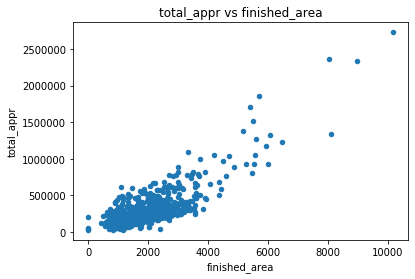

In [4]:
# Part 1
#
# 1.1
#
appraisal.plot(kind = 'scatter', x = 'finished_area', y = 'total_appr')
plt.title('total_appr vs finished_area');

In [5]:
# 1.2
# By inspecting the scatterplot, describe the relationship between total_appr and finished_area. Is the
# direction of association positive or negative? Is the relationship linear? How strong is the relationship?
#

In [10]:
# 1.3
# Do you see any points which might be considered outliers? Investigate those points.
#
appraisal[(appraisal['finished_area'] > 8000) & (appraisal['total_appr'] > 1250000)]

,council_district,total_appr,finished_area,year
118,34,2340200.0,8959.01465,2017
456,34,1344700.0,8107.50000,2017
918,34,2729000.0,10161.79980,2017
954,25,2365400.0,8020.25000,2017


In [6]:
import numpy as np

In [7]:
# 1.4
#
np.cov(appraisal['finished_area'], appraisal['total_appr'])

array([[9.28867453e+05, 1.83105455e+08],
       [1.83105455e+08, 5.31886099e+10]])

In [35]:
np.corrcoef(appraisal.finished_area, appraisal.total_appr)

array([[1.       , 0.8237873],
       [0.8237873, 1.       ]])

In [8]:
from nssstats.plots import quadrant_plot, half_plot

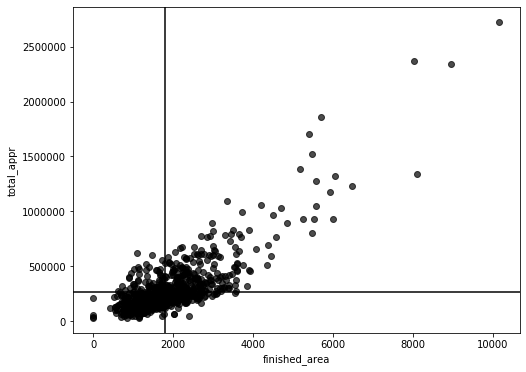

In [9]:
quadrant_plot(appraisal.finished_area, appraisal.total_appr, labels = ['finished_area', 'total_appr'])

In [11]:
# Part 2
# 
# Read this dataset into a dataframe named crashes
#
crashes = pd.read_csv('../data/crashes_subset.csv')
crashes.head(3)

,Accident Number,Date and Time,Number of Injuries,Hit and Run,Collision Type Description
0,20181075301,12/31/2018 10:55:00 PM,1,Y,Front to Rear
1,20181075381,12/31/2018 10:20:00 PM,0,Y,SIDESWIPE - SAME DIRECTION
2,20181075388,12/31/2018 09:50:00 PM,0,Y,HEAD-ON


In [15]:
# 2.1 Find the count of crashes by collision type. Create a bar plot showing the this count.
#
crashes.groupby('Collision Type Description').count()

,Accident Number,Date and Time,Number of Injuries,Hit and Run
Collision Type Description,,,,
Front to Rear,12903,12903,12903,12903
HEAD-ON,741,741,741,741
SIDESWIPE - SAME DIRECTION,5151,5151,5151,5151


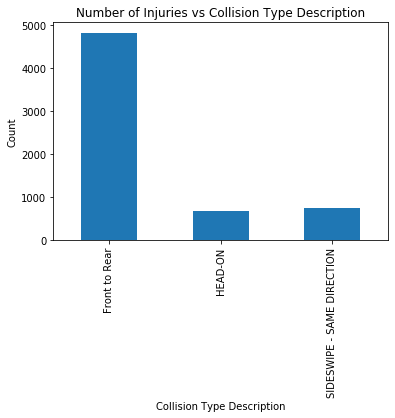

In [18]:
# 2.2 Create a boxplot showing number of injuries vs collision type description. What do you notice?
#
crashes.groupby('Collision Type Description')['Number of Injuries'].sum().plot(kind = 'bar')
plt.title('Number of Injuries vs Collision Type Description')
plt.ylabel('Count');

In [21]:
import seaborn as sns

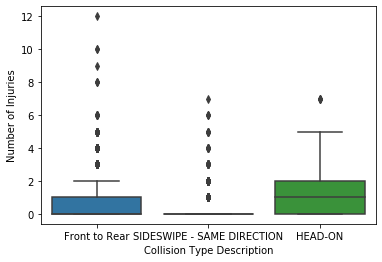

In [23]:
sns.boxplot(data = crashes, x = 'Collision Type Description', y = 'Number of Injuries');

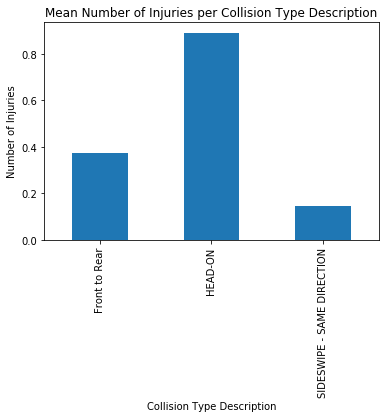

In [24]:
# 2.3 Find the average number of injuries per crash by collision type. Which type of crash has the highest
# average number of injuries. Create a box plot to show the distribution of injuries by collision type.
#
crashes.groupby('Collision Type Description')['Number of Injuries'].mean().plot(kind = 'bar')
plt.title('Mean Number of Injuries per Collision Type Description')
plt.ylabel('Number of Injuries');

In [25]:
# 2.4 Compare the rate of hit and run crashes by category. Create a bar plot to show what you find. What
# do you notice?
#
pd.crosstab(crashes['Hit and Run'], crashes['Collision Type Description'])

Collision Type Description,Front to Rear,HEAD-ON,SIDESWIPE - SAME DIRECTION
Hit and Run,,,
N,10361,608,3507
Y,2542,133,1644


In [26]:
pd.crosstab(crashes['Hit and Run'], crashes['Collision Type Description'], normalize='index')

Collision Type Description,Front to Rear,HEAD-ON,SIDESWIPE - SAME DIRECTION
Hit and Run,,,
N,0.715736,0.042001,0.242263
Y,0.588562,0.030794,0.380644


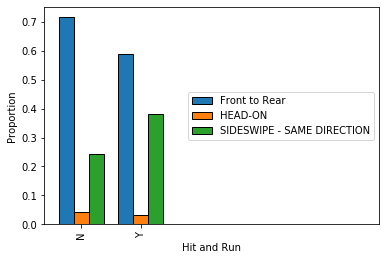

In [34]:
pd.crosstab(crashes['Hit and Run'],
            crashes['Collision Type Description'], 
            normalize='index').plot(kind = 'bar', 
                                    edgecolor = 'black', 
                                    width = 0.75)
plt.ylabel('Proportion')
plt.xlim(-0.625, 5)
plt.legend(loc = 'right');

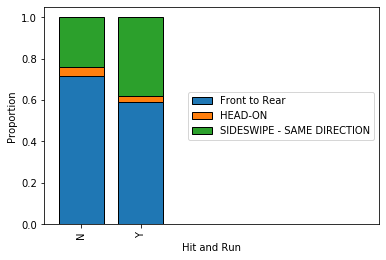

In [33]:
pd.crosstab(crashes['Hit and Run'], 
            crashes['Collision Type Description'], 
            normalize='index').plot(kind = 'bar', 
                                    edgecolor = 'black', 
                                    width = 0.75,
                                    stacked = True)
plt.ylabel('Proportion')
plt.xlim(-0.625, 5)
plt.legend(loc = 'right');